In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

##### 1. 데이터 불러오기

In [47]:
titanic = sns.load_dataset('titanic')
titanic = titanic[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']]

##### 2. 데이터 훑어보기

In [48]:
titanic.info()
titanic

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


,survived,pclass,sex,age,sibsp,parch,fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,NaN,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


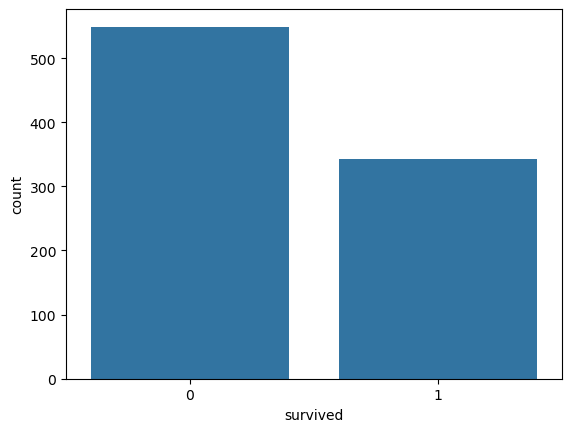

In [49]:
titanic['survived'].value_counts()
sns.countplot(x='survived', data=titanic)
plt.show()

##### 3. 데이터 시각화 통해 각각 변수 별 데이터 특성 살피기

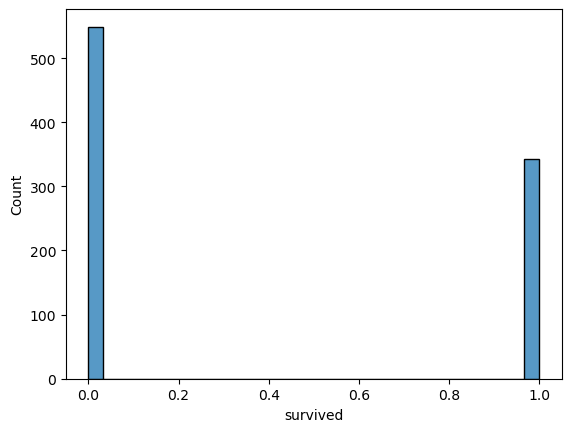

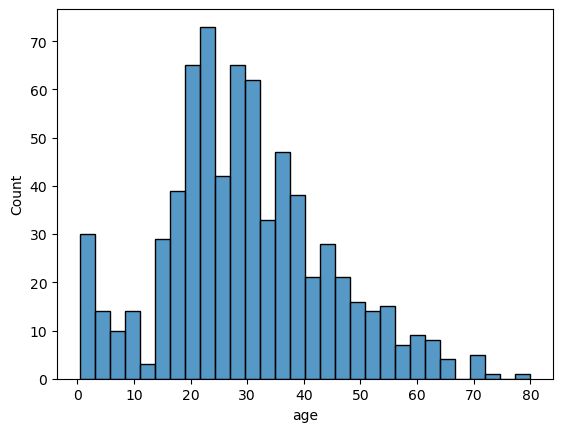

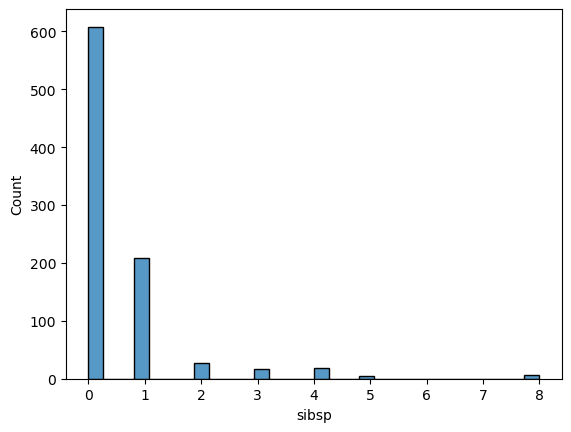

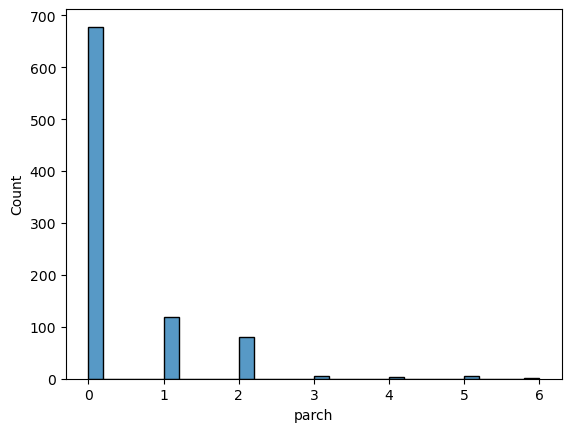

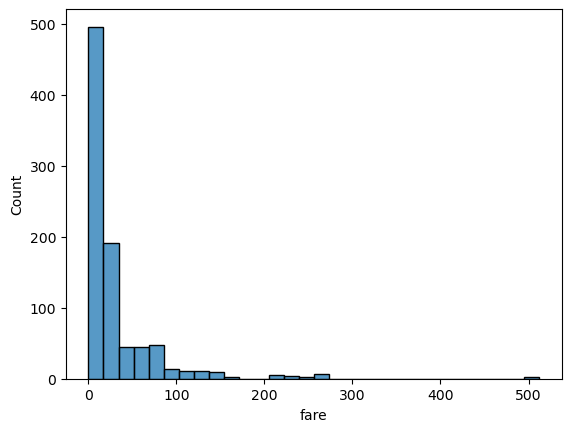

In [50]:
num_var = ['survived', 'age', 'sibsp', 'parch', 'fare']
for i in num_var:
    sns.histplot(titanic[i], bins=30)
    plt.show()

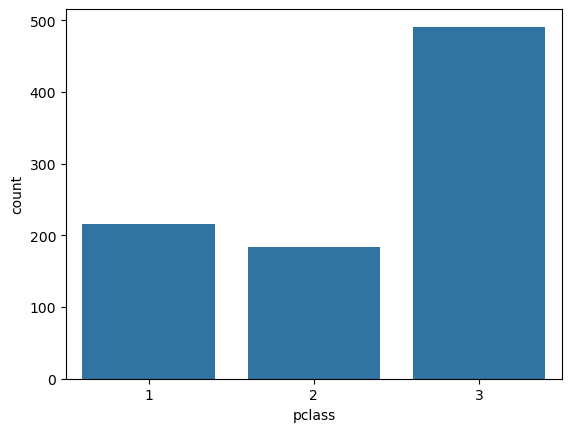

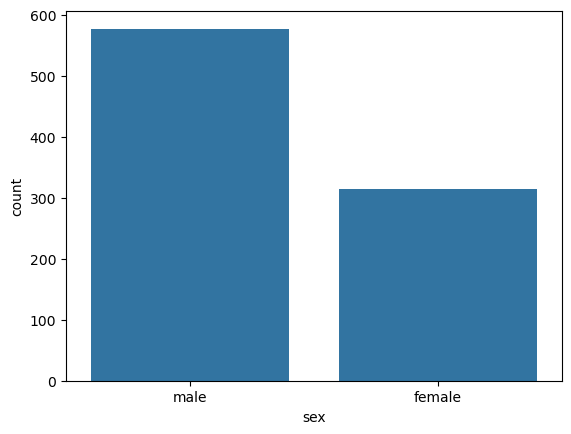

In [51]:
cat_var = ['pclass', 'sex']
for i in cat_var:
    sns.countplot(x=i, data=titanic)
    plt.show()

##### 4. 데이터 시각화 통해 변수 간 상관관계 살피기

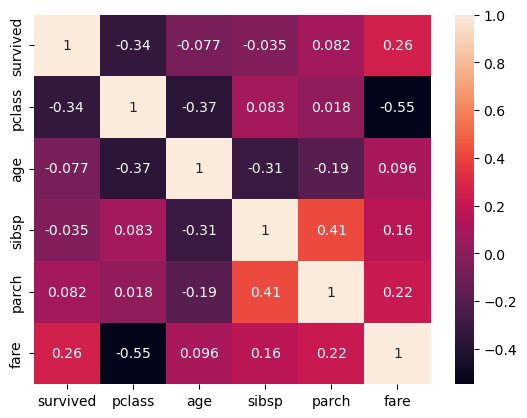

In [54]:
sns.heatmap(titanic.select_dtypes(include=['number']).corr(), annot=True)
plt.show()

##### 5. sibsp와 parch를 합쳐서 family라는 파생 변수 만들고, 기존 변수 제거 

In [55]:
titanic['family'] = titanic['sibsp'] + titanic['parch']
titanic.drop(['sibsp', 'parch'], axis=1, inplace=True)

##### 6. 결측치 제거 

In [56]:
titanic.dropna(inplace=True)

##### 7. 성별(Sex) 수치형(남성은 0, 여성은 1) 변수로 변환 

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(titanic['sex'])

##### 8. 특징(x)과 타겟(y) 분리 

###### a. 특징으로 pclass, sex, age, fare, family만 선택 

In [ ]:
X = titanic[['pclass', 'sex', 'age', 'fare', 'family']]

###### b. 타겟으로 survived만 선택 

In [ ]:
y = titanic['survived']

##### 9. 학습/검증 데이터셋 분리(학습 80%, 테스트 20%)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### 10. 결정트리 분류기 모델 구축 

In [ ]:
dt = DecisionTreeClassifier(random_state=42)

##### 11. 하이퍼파라미터 탐색 위한 세트 사전 구축 

In [ ]:
param_dist = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

##### 12. 랜덤 서치(RandomSearchCV) 통한 하이퍼파라미터 탐색 (반복 수 20으로 설정) 

In [ ]:
random_search = RandomizedSearchCV(dt, param_distributions=param_dist, n_iter=20, cv=5, scoring='accuracy')
random_search.fit(X_train, y_train)
print("Best parameters found:", random_search.best_params_)
print("Best Cross-Validation Score: {:.2f}".format(random_search.best_score_))

Best parameters found: {'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 5, 'criterion': 'gini'}
Best Cross-Validation Score: 0.72


##### 13. 최적의 모델로 검증 데이터셋 예측 수행

In [ ]:
best_dt = random_search.best_estimator_
y_pred = best_dt.predict(X_test)

##### 14. 최종 모델 정확도 확인

In [ ]:
print("Test Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred)))

Test Accuracy: 0.66
